In [ ]:
import cv2 as cv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

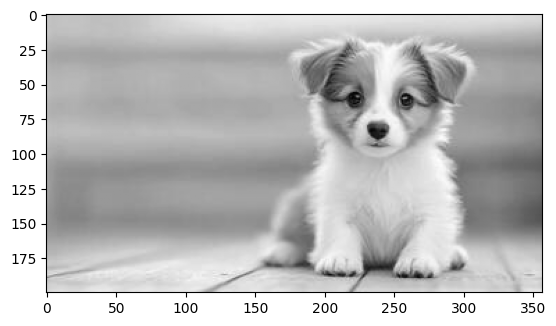

In [ ]:
from google.colab.patches import cv2_imshow
import cv2 as cv

img = cv.imread('dog.jpeg')
im = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(im, cmap='gray')

In [ ]:
laplacian = [
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
]

lap_im = im.copy()

x ,y = im.shape

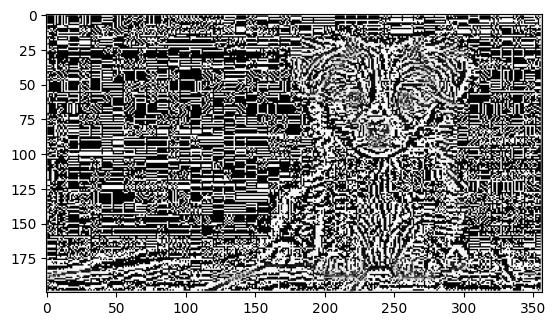

In [ ]:
lap_im = im.copy().astype(np.float64)
im = im.astype(np.float64)

for i in range(1, x - 1):
  for j in range(1, y - 1):
    lap_im[i, j] = (laplacian[0][0] * im[i-1, j-1] + laplacian[0][1] * im[i-1, j] + laplacian[0][2] * im[i-1, j+1] +
                    laplacian[1][0] * im[i, j-1] + laplacian[1][1] * im[i, j] + laplacian[1][2] * im[i, j+1] +
                    laplacian[2][0] * im[i+1, j-1] + laplacian[2][1] * im[i+1, j] + laplacian[2][2] * im[i+1, j+1])


plt.imshow(lap_im.astype(np.uint8), cmap='gray')

In [ ]:
sigma1 = 0.8
blur_im = cv.GaussianBlur(im, (0,0), sigma1)

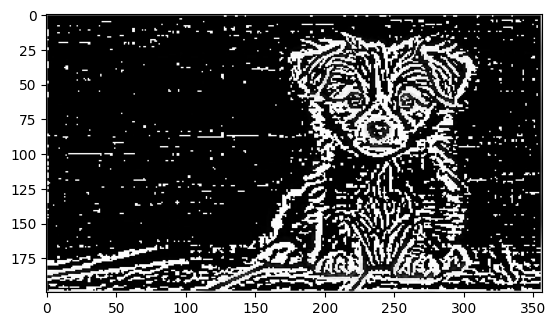

In [ ]:
sigma1 = 0.8
blur_im = cv.GaussianBlur(im, (0,0), sigma1)
laplacian = [
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
]
log_im = im.copy().astype(np.float64)
im = im.astype(np.float64)

for i in range(1, x - 1):
  for j in range(1, y - 1):
    log_im[i, j] = (laplacian[0][0] * blur_im[i-1, j-1] + laplacian[0][1] * blur_im[i-1, j] + laplacian[0][2] * blur_im[i-1, j+1] +
                    laplacian[1][0] * blur_im[i, j-1] + laplacian[1][1] * blur_im[i, j] + laplacian[1][2] * blur_im[i, j+1] +
                    laplacian[2][0] * blur_im[i+1, j-1] + laplacian[2][1] * blur_im[i+1, j] + laplacian[2][2] * blur_im[i+1, j+1])


plt.imshow(log_im.astype(np.uint8), cmap='gray')

In [ ]:
app = [
     [0, 0, -1, 0, 0],
     [0, -1, -2, -1, 0],
     [-1, -2, 16, -2, -1],
     [0, -1, -2, -1, 0],
     [0, 0, -1, 0, 0]
]

mm = im.copy()
app[0][2]


-1

LoG Method 2 (direct 5x5 LoG mask):


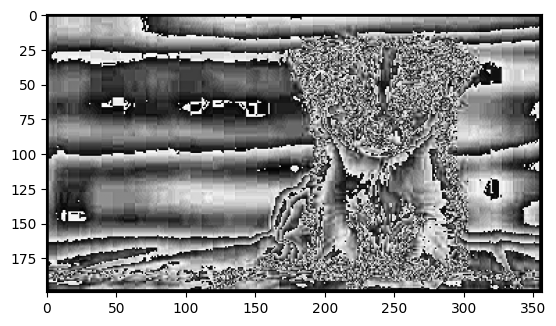

In [ ]:
log2_out = np.zeros_like(im, dtype=np.float64)

r, c = im.shape

for i in range(2, r-2):
    for j in range(2, c-2):
        val = (
            im[i-2, j-2]*app[0][0] + im[i-2, j-1]*app[0][1] + im[i-2, j]*app[0][2] + im[i-2, j+1]*app[0][3] + im[i-2, j+2]*app[0][4] +
            im[i-1, j-2]*app[1][0] + im[i-1, j-1]*app[1][1] + im[i-1, j]*app[1][2] + im[i-1, j+1]*app[1][3] + im[i-1, j+2]*app[1][4] +
            im[i,   j-2]*app[2][0] + im[i,   j-1]*app[2][1] + im[i,   j]*app[2][2] + im[i,   j+1]*app[2][3] + im[i,   j+2]*app[2][4] +
            im[i+1, j-2]*app[3][0] + im[i+1, j-1]*app[3][1] + im[i+1, j]*app[3][2] + im[i+1, j+1]*app[3][3] + im[i+1, j+2]*app[3][4] +
            im[i+2, j-2]*app[4][0] + im[i+2, j-1]*app[4][1] + im[i+2, j]*app[4][2] + im[i+2, j+1]*app[4][3] + im[i+2, j+2]*app[4][4]
        )
        log2_out[i, j] = val

print("LoG Method 2 (direct 5x5 LoG mask):")
plt.imshow(log2_out.astype(np.uint8), cmap='gray')
plt.show()

Canny Edge Detection Result:


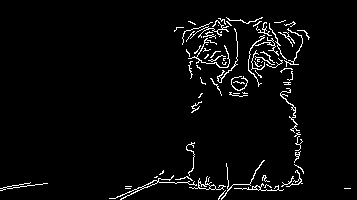

In [ ]:

img_gray_canny = cv.cvtColor(im, cv.COLOR_BGR2GRAY)


edges = cv.Canny(img_gray_canny, 100, 200)


print("Canny Edge Detection Result:")
cv2_imshow(edges)

cv.waitKey(0)
cv.destroyAllWindows()

Gaussian Blurred Grayscale Image:


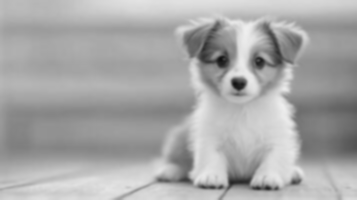

In [ ]:
img_blurred = cv.GaussianBlur(im, (5, 5), 0)
img_blurred_gray = cv.cvtColor(img_blurred, cv.COLOR_BGR2GRAY)
print("Gaussian Blurred Grayscale Image:")
cv2_imshow(img_blurred_gray)

Gradient Magnitude:


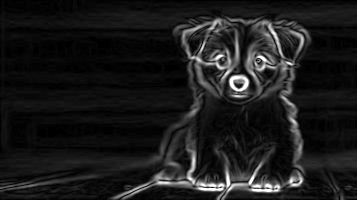

In [ ]:
grad_x = cv.Sobel(img_blurred_gray, cv.CV_64F, 1, 0, ksize=3)
grad_y = cv.Sobel(img_blurred_gray, cv.CV_64F, 0, 1, ksize=3)

magnitude = cv.magnitude(grad_x, grad_y)
direction = cv.phase(grad_x, grad_y)

magnitude_display = cv.convertScaleAbs(magnitude)

print("Gradient Magnitude:")
cv2_imshow(magnitude_display)

Non-Maximum Suppressed Edges:


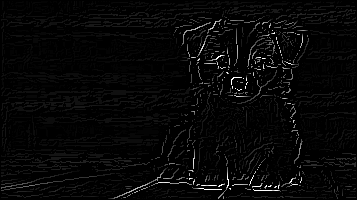

In [ ]:
m, n = magnitude.shape
non_max_suppressed = np.zeros((m, n), dtype=np.float32)

for i in range(1, m - 1):
    for j in range(1, n - 1):
        angle = direction[i, j] * 180. / np.pi
        if angle < 0:
            angle += 180

        # Quantize the angle to 0, 45, 90, 135 degrees
        if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
            neighbor1 = magnitude[i, j + 1]
            neighbor2 = magnitude[i, j - 1]
        elif (22.5 <= angle < 67.5):
            neighbor1 = magnitude[i - 1, j + 1]
            neighbor2 = magnitude[i + 1, j - 1]
        elif (67.5 <= angle < 112.5):
            neighbor1 = magnitude[i - 1, j]
            neighbor2 = magnitude[i + 1, j]
        else: # 112.5 <= angle < 157.5
            neighbor1 = magnitude[i - 1, j - 1]
            neighbor2 = magnitude[i + 1, j + 1]

        if magnitude[i, j] >= neighbor1 and magnitude[i, j] >= neighbor2:
            non_max_suppressed[i, j] = magnitude[i, j]

non_max_suppressed_display = cv.convertScaleAbs(non_max_suppressed)

print("Non-Maximum Suppressed Edges:")
cv2_imshow(non_max_suppressed_display)

Double Thresholded Image (Strong Edges = 255, Weak Edges = 100):


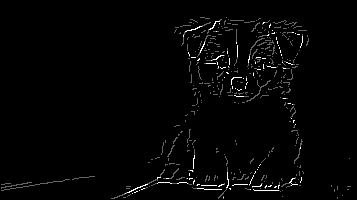

In [ ]:
high_threshold = 150
low_threshold = 50

thresholded_img = np.zeros_like(non_max_suppressed, dtype=np.uint8)

strong_edges = (non_max_suppressed >= high_threshold)
weak_edges = ((non_max_suppressed >= low_threshold) & (non_max_suppressed < high_threshold))

thresholded_img[strong_edges] = 255
thresholded_img[weak_edges] = 100

print("Double Thresholded Image (Strong Edges = 255, Weak Edges = 100):")
cv2_imshow(thresholded_img)

Final Edges after Hysteresis Thresholding:


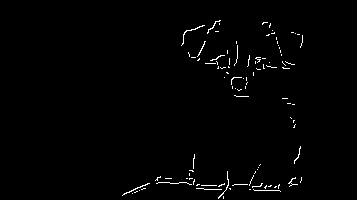

In [ ]:
result_img = np.copy(thresholded_img)
m, n = result_img.shape

# Iterate through pixels and connect weak edges to strong edges
for i in range(1, m - 1):
    for j in range(1, n - 1):
        if result_img[i, j] == 100: # If it's a weak edge
            # Check 8-connected neighbors
            if (result_img[i - 1, j - 1] == 255 or result_img[i - 1, j] == 255 or
                result_img[i - 1, j + 1] == 255 or result_img[i, j - 1] == 255 or
                result_img[i, j + 1] == 255 or result_img[i + 1, j - 1] == 255 or
                result_img[i + 1, j] == 255 or result_img[i + 1, j + 1] == 255):
                result_img[i, j] = 255 # Mark as strong edge
            else:
                result_img[i, j] = 0 # Suppress if not connected to strong edge

print("Final Edges after Hysteresis Thresholding:")
cv2_imshow(result_img)